In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cvd = pd.read_csv(r"C:\Users\youss\OneDrive\Desktop\CVD_cleaned.csv")

In [3]:
cvd.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Data Pre-processing

**In the documentation of the [dataset](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset), the author mentioned that he already pre-processed and cleaned the data, let's double check**

In [4]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
cvd.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

We can approve that there are no nulls in the data.

**One problem we are going to face when using SVM, is that it only accepts numeric values, so for this reason I'm going to turn all the dataset to numeric values**

In [6]:
data = cvd.copy()

**First: `General_Health` Column**

In [7]:
data['General_Health'].value_counts()

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

In [8]:
data.loc[data['General_Health'] == 'Poor', 'General_Health'] = 1
data.loc[data['General_Health'] == 'Fair', 'General_Health'] = 2
data.loc[data['General_Health'] == 'Good', 'General_Health'] = 3
data.loc[data['General_Health'] == 'Very Good', 'General_Health'] = 4
data.loc[data['General_Health'] == 'Excellent', 'General_Health'] = 5

In [9]:
data['General_Health'].value_counts()

General_Health
4    110395
3     95364
5     55954
2     35810
1     11331
Name: count, dtype: int64

**Second: `Checkup` Column**

In [10]:
data['Checkup'].value_counts()

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

In [11]:
data.loc[data['Checkup'] == 'Never', 'Checkup'] = 1
data.loc[data['Checkup'] == '5 or more years ago', 'Checkup'] = 2
data.loc[data['Checkup'] == 'Within the past 5 years', 'Checkup'] = 3
data.loc[data['Checkup'] == 'Within the past 2 years', 'Checkup'] = 4
data.loc[data['Checkup'] == 'Within the past year', 'Checkup'] = 5

In [12]:
data['Checkup'].value_counts()

Checkup
5    239371
4     37213
3     17442
2     13421
1      1407
Name: count, dtype: int64

**Third: `Exercise` Column**

In [13]:
data['Exercise'].value_counts()

Exercise
Yes    239381
No      69473
Name: count, dtype: int64

In [14]:
data['Exercise'] = data['Exercise'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [15]:
data['Exercise'].value_counts()

Exercise
1    239381
0     69473
Name: count, dtype: int64

**Fourth: `Heart_Disease` Column**

Note: This is our target column.

In [16]:
data['Heart_Disease'].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

In [17]:
data['Heart_Disease'] = data['Heart_Disease'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [18]:
data['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

**Fifth: `Skin_Cancer` Column**

In [19]:
data['Skin_Cancer'].value_counts()

Skin_Cancer
No     278860
Yes     29994
Name: count, dtype: int64

In [20]:
data['Skin_Cancer'] = data['Skin_Cancer'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [21]:
data['Skin_Cancer'].value_counts()

Skin_Cancer
0    278860
1     29994
Name: count, dtype: int64

**Sixth: `Other_Cancer` Column**

In [22]:
data['Other_Cancer'].value_counts()

Other_Cancer
No     278976
Yes     29878
Name: count, dtype: int64

In [23]:
data['Other_Cancer'] = data['Other_Cancer'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [24]:
data['Other_Cancer'].value_counts()

Other_Cancer
0    278976
1     29878
Name: count, dtype: int64

**Seventh: `Depression` Column**

In [25]:
data['Depression'].value_counts()

Depression
No     246953
Yes     61901
Name: count, dtype: int64

In [26]:
data['Depression'] = data['Depression'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [27]:
data['Depression'].value_counts()

Depression
0    246953
1     61901
Name: count, dtype: int64

**Eighth: `Diabetes` Column**

In [28]:
data['Diabetes'].value_counts()

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64

In [29]:
pattern = r'([,] .*)'
data['Diabetes'] = data['Diabetes'].str.replace(pattern, '', regex=True)
data['Diabetes'] = data['Diabetes'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [30]:
data['Diabetes'].value_counts()

Diabetes
0    266037
1     42817
Name: count, dtype: int64

**Ninth: `Arthritis` Column**

In [31]:
data['Arthritis'].value_counts()

Arthritis
No     207783
Yes    101071
Name: count, dtype: int64

In [32]:
data['Arthritis'] = data['Arthritis'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [33]:
data['Arthritis'].value_counts()

Arthritis
0    207783
1    101071
Name: count, dtype: int64

**Tenth: `Sex` Column**

In [34]:
data['Sex'].value_counts()

Sex
Female    160196
Male      148658
Name: count, dtype: int64

In [35]:
data['Sex'] = data['Sex'].str.replace('Female', '1').str.replace('Male', '2').astype(str)

In [36]:
data['Sex'].value_counts()

Sex
1    160196
2    148658
Name: count, dtype: int64

**Eleventh: `Smoking_History` Column**

In [37]:
data['Smoking_History'].value_counts()

Smoking_History
No     183590
Yes    125264
Name: count, dtype: int64

In [38]:
data['Smoking_History'] = data['Smoking_History'].str.replace('No', '0').str.replace('Yes', '1').astype(int)

In [39]:
data['Smoking_History'].value_counts()

Smoking_History
0    183590
1    125264
Name: count, dtype: int64

In [40]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,4,0,0,0,0,0,0,1,1,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,5,0,1,0,0,0,1,0,1,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,5,1,0,0,0,0,1,0,1,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,5,1,1,0,0,0,1,0,2,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,5,0,0,0,0,0,0,0,2,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


**Now we can go on with analyzing the dataset and building the model.**

## Data Analysis and Visualization

**For the Data Analysis Part, I Will Set a Few Questions, and I Will Answer Them in This Part:**

- Is Smoking a main reason of CVD or not?
- Does People Who Exercise have Less Chance of Getting CVD?
- Are Males More Exposed to be Diagnosed with CVD than Females or Not?
- Do Age Contribute in CVD or Not?

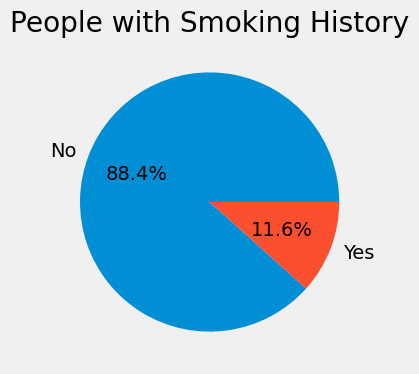

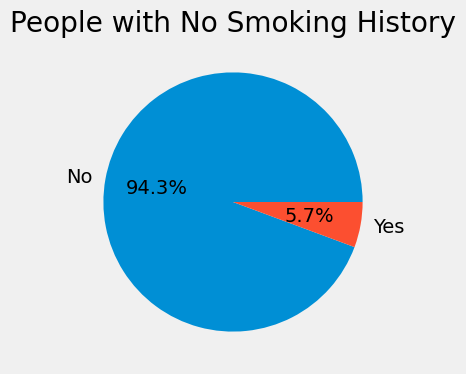

In [41]:
plt.style.use('fivethirtyeight')
smoke = cvd[cvd['Smoking_History'] == 'Yes']
nonsmoke = cvd[cvd['Smoking_History'] == 'No']
smoke['Heart_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='People with Smoking History')
plt.ylabel('')  
plt.show()
nonsmoke['Heart_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='People with No Smoking History')
plt.ylabel('')  
plt.show()

**It Appeares That Smoking is Not a Main Reason of CVD**

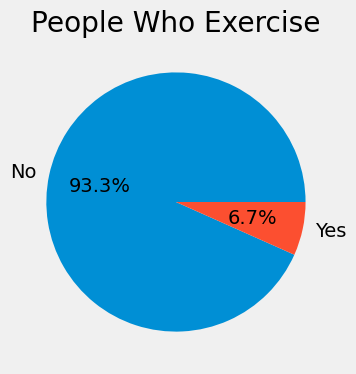

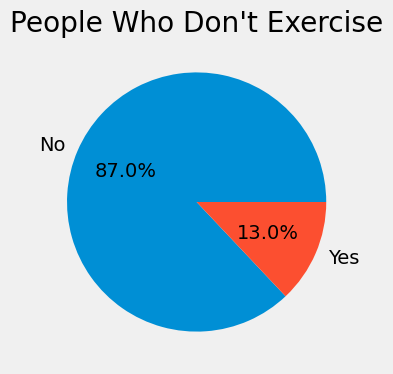

In [42]:
exerc = cvd[cvd['Exercise'] == 'Yes']
noexerc = cvd[cvd['Exercise'] == 'No']
plt.style.use('fivethirtyeight')
exerc['Heart_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='People Who Exercise')
plt.ylabel('')  
plt.show()
noexerc['Heart_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='People Who Don\'t Exercise')
plt.ylabel('')  
plt.show()

**From the Above Chart We Can See That the Percentage of People Who are Diagnosed with CVD is Slightly Higher in People Who Don't Exercise, so we can say that people who exercise are less exposed to CVD.**

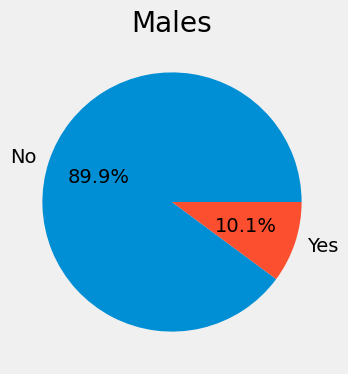

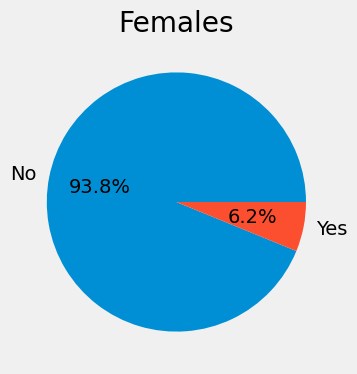

In [43]:
males = cvd[cvd['Sex'] == 'Male']
females = cvd[cvd['Sex'] == 'Female']
plt.style.use('fivethirtyeight')
males['Heart_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='Males')
plt.ylabel('')
plt.show()
females['Heart_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='Females')
plt.ylabel('')
plt.show()

**Here we can see that males have higher risk to be diagnosed with CVD than females.**

In [44]:
cvd['Age_Category'].value_counts().sort_index(ascending=True)

Age_Category
18-24    18681
25-29    15494
30-34    18428
35-39    20606
40-44    21595
45-49    20968
50-54    25097
55-59    28054
60-64    32418
65-69    33434
70-74    31103
75-79    20705
80+      22271
Name: count, dtype: int64

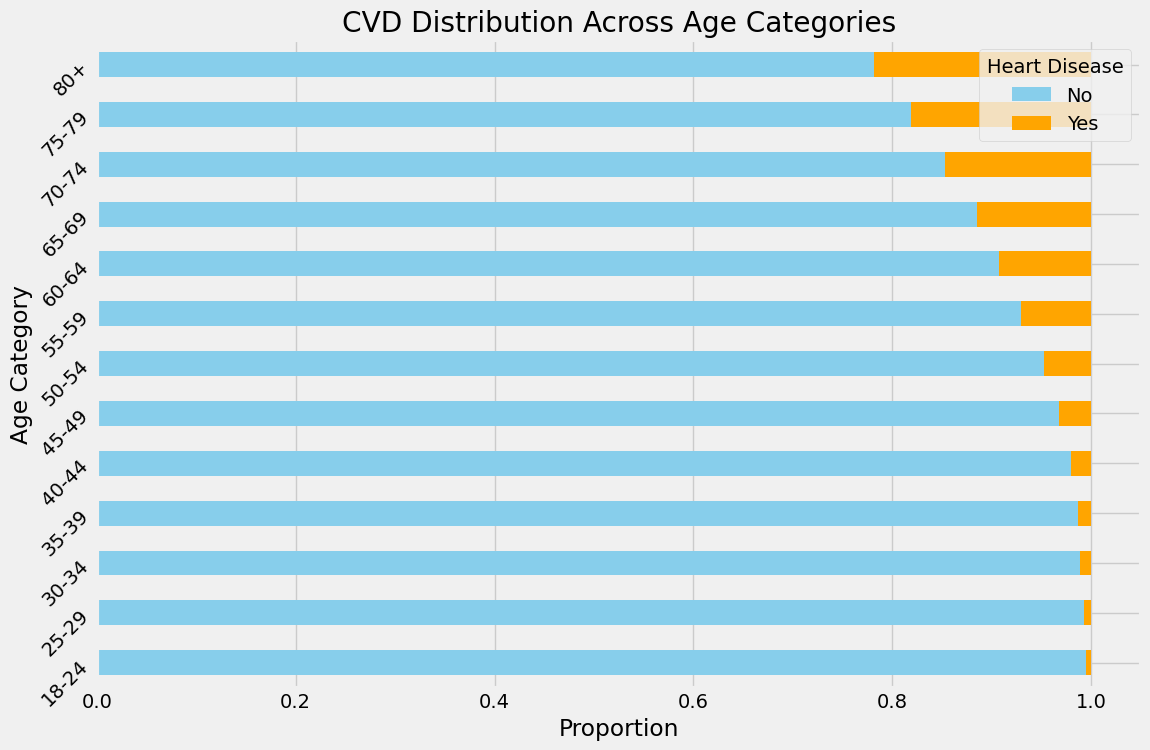

In [45]:
age_heart_disease = pd.crosstab(cvd['Age_Category'], cvd['Heart_Disease'])
age_heart_disease_pct = age_heart_disease.div(age_heart_disease.sum(axis=1), axis=0)

age_heart_disease_pct.plot(kind='barh', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'], rot = 45)
plt.style.use('fivethirtyeight')
plt.title('CVD Distribution Across Age Categories')
plt.xlabel('Proportion')
plt.ylabel('Age Category')
plt.legend(title='Heart Disease')
plt.show()

**From the previous plot we can confirm that the age does contribute in CVD**

## Predicting CVD 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
sample = data.sample(1000, random_state=5)

In [48]:
X = sample.drop(columns=['Heart_Disease'])
y = sample['Heart_Disease']

In [49]:
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=417, stratify=y)

In [51]:
svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [52]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [53]:
y_pred = grid.best_estimator_.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[279   0]
 [ 21   0]]


- **True Negatives (TN)**: 279 - The model correctly predicted "no heart disease" for 279 instances.
- **False Positives (FP)**: 0 - The model incorrectly predicted "heart disease" when there wasn't any (0 instances).
- **False Negatives (FN)**: 21 - The model incorrectly predicted "no heart disease" when there actually was heart disease (21 instances).
- **True Positives (TP)**: 0 - The model correctly predicted "heart disease" for 0 instances.

In [54]:
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))


Accuracy Score:  0.93


**The model got an accuracy score of 93%**

In [55]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       279
           1       1.00      0.00      0.00        21

    accuracy                           0.93       300
   macro avg       0.97      0.50      0.48       300
weighted avg       0.93      0.93      0.90       300



**Class 0 (No Heart Disease):**

- **Precision**: 0.93 - Out of all instances predicted as "no heart disease," 93% were actually correct.
- **Recall**: 1.00 - The model identified all true "no heart disease" cases correctly.
- **F1-Score**: 0.96 - The harmonic mean of precision and recall, representing the balance between them.

**Class 1 (Heart Disease):**

- **Precision**: 1.00 - Out of all instances predicted as "heart disease," 100% were correct (however, none were actually predicted as positive).
- **Recall**: 0.00 - The model failed to identify any true "heart disease" cases, resulting in a recall of 0.
- **F1-Score**: 0.00 - The F1-score is 0 because both precision and recall are poorly aligned.

**Macro Average:**

- Averages the metrics (precision, recall, F1-score) for both classes. Here, the precision is high due to class 0, but recall is poor due to class 1.

**Weighted Average:**

- Takes into account the support (number of true instances) for each class. Here, it still reflects a good performance due to the model's success in predicting the majority class (class 0).